<a href="https://colab.research.google.com/github/alialthiab/Data-Science/blob/Machine-Learning/Classification_Project_with_the_mnist_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# -----------Classification---------
  ### MNIST Dataset
- <font color= blue>checklist</font> : 
    - Frame the problem and look at the big picture
    - Get the data
    - Explore and prepare the data
    - try different models and choose the best one 
    - present your solution
    - lunch, monitor, and maintain your system

### First step getting the dataset 


In [1]:
from sklearn.datasets import fetch_openml
mnist =fetch_openml('mnist_784')

### exploring and preparing the dataset

In [2]:
type(mnist)

sklearn.utils.Bunch

In [3]:
mnist

{'DESCR': "**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered i

In [4]:
import pandas as pd 
import pandas as pd
df = pd.DataFrame(mnist.data, columns= mnist.feature_names)
df["class"] = pd.Series(mnist.target)

In [5]:
df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,252.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 785 entries, pixel1 to class
dtypes: float64(784), object(1)
memory usage: 419.2+ MB


In [7]:
df.info(verbose=True,null_counts=True)
# Show all the data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 785 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pixel1    70000 non-null  float64
 1   pixel2    70000 non-null  float64
 2   pixel3    70000 non-null  float64
 3   pixel4    70000 non-null  float64
 4   pixel5    70000 non-null  float64
 5   pixel6    70000 non-null  float64
 6   pixel7    70000 non-null  float64
 7   pixel8    70000 non-null  float64
 8   pixel9    70000 non-null  float64
 9   pixel10   70000 non-null  float64
 10  pixel11   70000 non-null  float64
 11  pixel12   70000 non-null  float64
 12  pixel13   70000 non-null  float64
 13  pixel14   70000 non-null  float64
 14  pixel15   70000 non-null  float64
 15  pixel16   70000 non-null  float64
 16  pixel17   70000 non-null  float64
 17  pixel18   70000 non-null  float64
 18  pixel19   70000 non-null  float64
 19  pixel20   70000 non-null  float64
 20  pixel21   70000 non-null  f

Check if there is a null values

In [8]:
pd.set_option('display.max_rows',785)
df.isnull().sum()

pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
pixel6      0
pixel7      0
pixel8      0
pixel9      0
pixel10     0
pixel11     0
pixel12     0
pixel13     0
pixel14     0
pixel15     0
pixel16     0
pixel17     0
pixel18     0
pixel19     0
pixel20     0
pixel21     0
pixel22     0
pixel23     0
pixel24     0
pixel25     0
pixel26     0
pixel27     0
pixel28     0
pixel29     0
pixel30     0
pixel31     0
pixel32     0
pixel33     0
pixel34     0
pixel35     0
pixel36     0
pixel37     0
pixel38     0
pixel39     0
pixel40     0
pixel41     0
pixel42     0
pixel43     0
pixel44     0
pixel45     0
pixel46     0
pixel47     0
pixel48     0
pixel49     0
pixel50     0
pixel51     0
pixel52     0
pixel53     0
pixel54     0
pixel55     0
pixel56     0
pixel57     0
pixel58     0
pixel59     0
pixel60     0
pixel61     0
pixel62     0
pixel63     0
pixel64     0
pixel65     0
pixel66     0
pixel67     0
pixel68     0
pixel69     0
pixel70     0
pixel71     0
pixel7

In [9]:
df.shape[0]

70000

In [10]:
# looking at the array
x, y = mnist["data"], mnist["target"]
x.shape


(70000, 784)

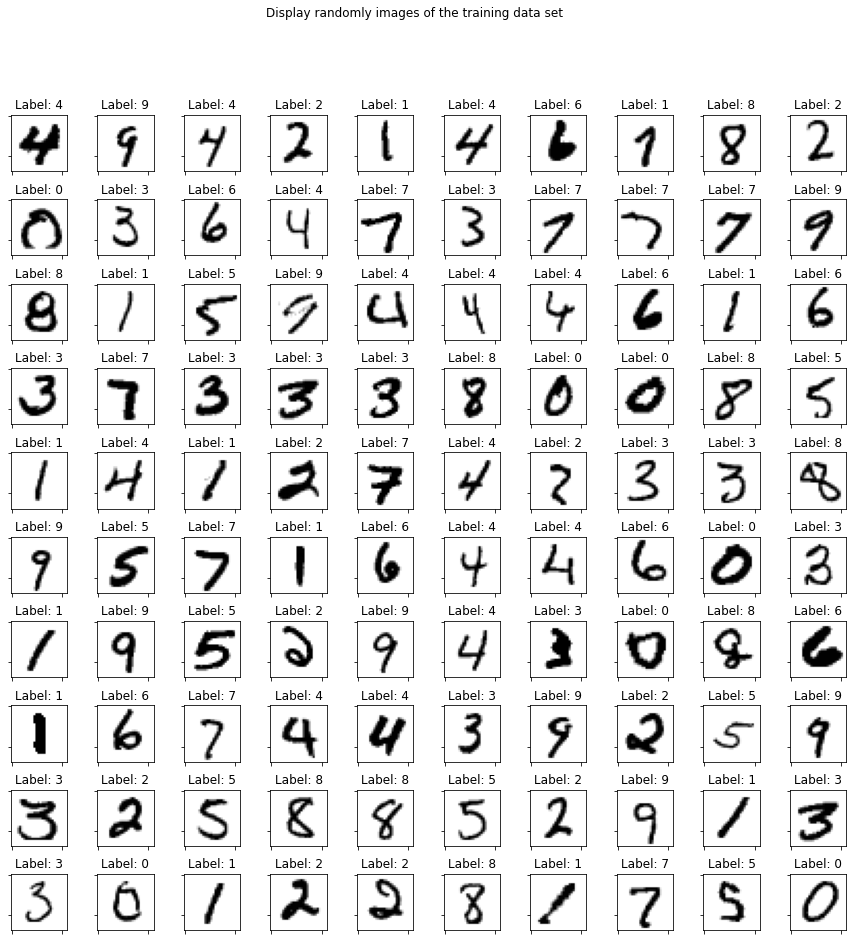

In [11]:
# visualize the instances as images
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
def displayData(X,Y):
    # set up array
    fig, ax = plt.subplots(nrows=10, ncols=10, figsize=(15,15))
    fig.suptitle( "Display randomly images of the training data set")
    # loop over randomly drawn numbers
    for i in range(10):
        for j in range(10):
            ind = np.random.randint(X.shape[0])
            tmp = X[ind,:].reshape(28,28)
            ax[i,j].set_title("Label: {}".format(Y[ind]))
            ax[i,j].imshow(tmp, cmap='gray_r') # display it as gray colors.
            plt.setp(ax[i,j].get_xticklabels(), visible=False)
            plt.setp(ax[i,j].get_yticklabels(), visible=False)
    
    fig.subplots_adjust(hspace=0.5, wspace=0.5)

displayData(x,y)

### splitting the dataset

In [12]:
import numpy as np 
x_train, x_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]

### Shuffling the training set

In [13]:
# Shuffling the training set will guarantee that all cross-validation folds will
# be similar (you don’t want one fold to be missing some digits). Moreover, some learning
# algorithms are sensitive to the order of the training instances, and they perform
# poorly if they get many similar instances in a row. Shuffling the dataset ensure that this won't happen
import numpy as np
shuffle_index = np.random.permutation(60000)
# np.random.peremutation(10)
# array([1, 7, 4, 3, 0, 9, 2, 5, 8, 6,10,11,550 ... etc]) 
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

### Peek at one digit from the dataset


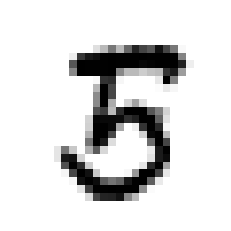

In [14]:
# peek at one digit from the dataset
import matplotlib.pyplot as plt
import matplotlib
some_digit = x[4600] # [0,0,0,1,0,......2,2,0,0,0,]
# [0,0,0,0, ....]
# [0,0,0,0, ....]
#784 >> 28 *28
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()

In [15]:
# this is a label 
y[4600]

'5'

### Training a <font color= red>Binary</font> classifier 


In [16]:
# This “5-detector” will be an example of a binary classifier, capable of
# distinguishing between just two classes, 5 and not-5.

y_train_5 = (y_train == '5') # True for all 5s, False for all other digits.
y_test_5 = (y_test == '5')
y_train_5

array([False, False, False, ..., False, False, False])

### SGD classifier

In [17]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x_train, y_train_5)
# now it can detect if an image is 5 or not
value=sgd_clf.predict([some_digit])
value

array([ True])

In [18]:
sgd_clf.predict([x[3300]])

array([False])

#### Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
lo_clf = LogisticRegression()
lo_clf.fit(x_train, y_train_5)
# now it can detect if an image is 5 or not
value=lo_clf.predict([some_digit])
value

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([ True])

## Performance measure 

####  Measuring Accuracy Using <font color= blue>Cross-validation</font>

In [20]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, x_train, y_train_5, cv=3, scoring="accuracy")
# Don't get too excited :(((

array([0.9668 , 0.95565, 0.96415])

In [21]:
# BaseEstimato
# Extra
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, x, y=None):
        pass
    def predict(self, x):
        return np.zeros((len(x), 1), dtype=bool)
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, x_train, y_train_5, cv=3, scoring="accuracy")

array([0.90955, 0.90895, 0.91045])

## Confusion matrix

In [22]:
# confusion matrix
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53652,   927],
       [ 1341,  4080]])

In [23]:
# perfect classifier would have only true positives and true negative
confusion_matrix(y_train_5, y_train_5)

array([[54579,     0],
       [    0,  5421]])

## Precision and Recall

In [24]:
# precision the accuracy of the positive predictions
# TPR ratio of positive instances that are correctly detected by classifier
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred) # == 3963 / (3963 + 580)

0.8148591971240263

In [25]:
recall_score(y_train_5, y_train_pred) # == 3963 / (3963 + 1458)

0.7526286662977311

In [26]:
# Combining precision and Recall together using a 
# harmonic mean F1 (it gives more weight to low values) of precision and recall
# NOTE incresing precision reduces recall and vice versa 
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7825086306098963

## Precision and Recall tradoff

In [27]:
# similar to predict(threshold by defult = 0) function 
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([3475.59113846])

In [28]:
threshold = 0
some_digit_pred = (some_digit_scores > threshold) 
some_digit_pred

array([ True])

#### Choosing best threshold


In [29]:
y_scores = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3,method="decision_function")

In [30]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

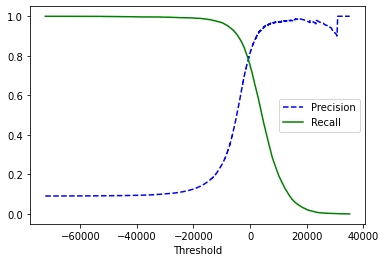

In [31]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend()
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

#### Exersice
* another way to find best threshold is to plot precision VS Recall 
* Plot Precision Vs Recall

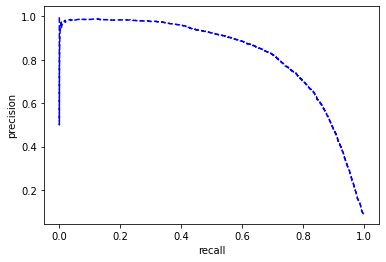

In [ ]:
def plot_precision_recall(precisions, recalls):
   plt.plot(recalls, precisions, "b--")
   plt.xlabel("recall")
   plt.ylabel("precision")
plot_precision_recall(precisions, recalls)
plt.show()

In [ ]:
# if we want the threshold with 90% precision
# np.argmax() will give us the first index of the maximum value
# which in this case means the first True value
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)] 
threshold_90_precision

4262.475761540889

In [ ]:
# y_scores = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3,method="decision_function")
train_pred_90 = (y_scores >= threshold_90_precision)

In [ ]:
# Precision after changning threshold
precision_score(y_train_5, train_pred_90)

0.9001168224299065

In [ ]:
# recall after changning threshold
recall_score(y_train_5, train_pred_90)

0.5685297915513743

## ROC (receiver operating characteristic)

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

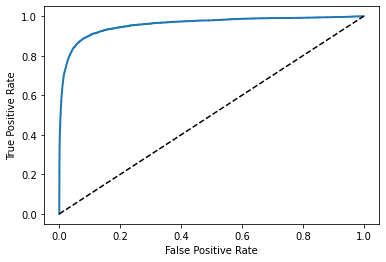

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")    
plot_roc_curve(fpr, tpr)
plt.show()


## Multiclass Classification

In [ ]:
# Scikit-Learn detects when you try to use a binary classification algorithm 
# for a multiclass classification task
sgd_clf.fit(x_train, y_train) # y_train, not y_train_5
sgd_clf.predict([some_digit])

array(['5'], dtype='<U1')

In [ ]:
sgd_clf.predict([x[3000]])

array(['9'], dtype='<U1')

In [ ]:
 y[3000]

'9'

In [ ]:
# it will return 10 scores one per class
# The highest score is indeed the one corresponding to class 4:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores # 8 / 5 

array([[-34957.87486702, -25317.16175628,  -9118.7145261 ,
         -2964.40943086, -22621.9598348 ,   3624.45258294,
        -24482.17483884, -36340.1918604 ,  -2146.56046532,
         -4856.47218511]])

### Training random forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)

In [ ]:
forest_clf.fit(x_train, y_train)
forest_clf.predict([some_digit])

array(['5'], dtype=object)

In [ ]:
# call predict_proba() to get the list of probabilities 
# that the classifier assigned to each instance for each class
forest_clf.predict_proba([some_digit])

array([[0.  , 0.  , 0.02, 0.06, 0.  , 0.76, 0.  , 0.  , 0.16, 0.  ]])

## Testing random forest and SGD classifier

In [ ]:
y_test_pred = cross_val_predict(forest_clf, x_test, y_test, cv=3)
precision_score(y_test, y_test_pred, average='macro')

0.9402828946698101

In [ ]:
from sklearn.metrics import accuracy_score
predictions=forest_clf.predict(x_test)
accuracy_score(y_test,predictions)

0.9688

In [ ]:
prediction_rgd=sgd_clf.predict(x_test)
accuracy_score(y_test,prediction_rgd)


0.8822

In [ ]:
confusion_matrix(y_test, y_test_pred)

array([[ 961,    1,    1,    1,    0,    6,    5,    1,    4,    0],
       [   0, 1121,    4,    3,    0,    2,    3,    1,    1,    0],
       [   8,    0,  966,    6,   11,    5,    7,   17,    9,    3],
       [   0,    1,   22,  927,    1,   21,    1,   15,   18,    4],
       [   0,    1,    1,    0,  929,    0,   11,    1,    3,   36],
       [   8,    5,    1,   24,    3,  821,   10,    2,    9,    9],
       [  12,    4,    3,    0,    4,    6,  924,    0,    5,    0],
       [   2,   13,   26,    1,    6,    2,    0,  953,    1,   24],
       [   5,    7,    5,   15,    6,   12,    8,    6,  896,   14],
       [   8,    6,    4,   12,   31,    5,    1,   14,   18,  910]])

## Multilabel

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train.astype(np.int8) >= 3)
y_train_less = (y_train.astype(np.int8) <= 7)
y_cond=np.c_[y_train_large,y_train_less]
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_cond)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
knn_clf.predict([some_digit])

array([[ True,  True]])